<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/VGG16_mild_moderate_DR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split')


['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/train')


['Mild', 'undersampled_Moderate']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/train',
                                          target_size=(64,64),
                                          class_mode='categorical')

valimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/val',
                                          target_size=(64,64),
                                          class_mode='categorical')
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Mild DR undersampled moderate DR folder/split/test',
                                            target_size=(64,64),
                                            class_mode='categorical')


Found 591 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [ ]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights="imagenet",
                               input_shape=(64,64,3))
VGG.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14850114 (56.65 MB)
Trainable params: 135426 (529.01 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.fit(trainimages,
          batch_size=32,
          epochs=10,
          validation_data=valimages)
model.save('mild_moderate_DRVGG16_model.keras')

Epoch 1/10
19/19 [==============================] - 154s 8s/step - loss: 0.7208 - accuracy: 0.5178 - val_loss: 0.6251 - val_accuracy: 0.6622
Epoch 2/10
19/19 [==============================] - 37s 2s/step - loss: 0.6294 - accuracy: 0.6667 - val_loss: 0.5699 - val_accuracy: 0.7568
Epoch 3/10
19/19 [==============================] - 50s 3s/step - loss: 0.6111 - accuracy: 0.6785 - val_loss: 0.5594 - val_accuracy: 0.7297
Epoch 4/10
19/19 [==============================] - 61s 3s/step - loss: 0.5809 - accuracy: 0.7090 - val_loss: 0.5471 - val_accuracy: 0.7162
Epoch 5/10
19/19 [==============================] - 58s 3s/step - loss: 0.5705 - accuracy: 0.7107 - val_loss: 0.5847 - val_accuracy: 0.7297
Epoch 6/10
19/19 [==============================] - 55s 3s/step - loss: 0.5474 - accuracy: 0.7411 - val_loss: 0.5391 - val_accuracy: 0.7297
Epoch 7/10
19/19 [==============================] - 46s 2s/step - loss: 0.5411 - accuracy: 0.7327 - val_loss: 0.5586 - val_accuracy: 0.7162
Epoch 8/10
19/19 [=

In [39]:
predictions = model.predict(testimages)

3/3 [==============================] - 4s 923ms/step


In [40]:
y_pred = np.argmax(predictions, axis=1)

In [9]:
y_true = testimages.classes

In [41]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred)

array([[27, 11],
       [17, 20]])

In [42]:
print(metrics.classification_report(y_true, y_pred,
                                    target_names=('mild DR', 'moderate DR')))

              precision    recall  f1-score   support

     mild DR       0.61      0.71      0.66        38
 moderate DR       0.65      0.54      0.59        37

    accuracy                           0.63        75
   macro avg       0.63      0.63      0.62        75
weighted avg       0.63      0.63      0.62        75



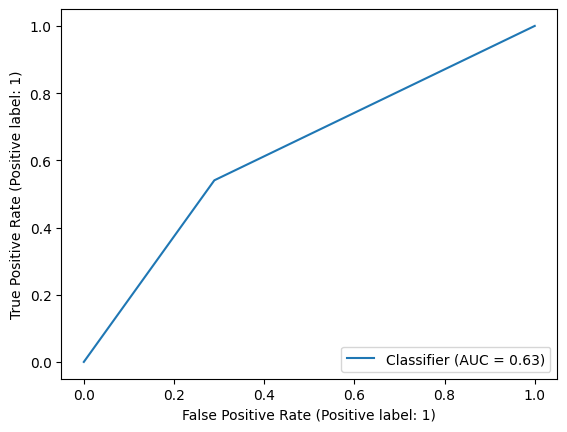

In [43]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

In [25]:
testimages.class_indices

{'Mild': 0, 'undersampled_Moderate': 1}

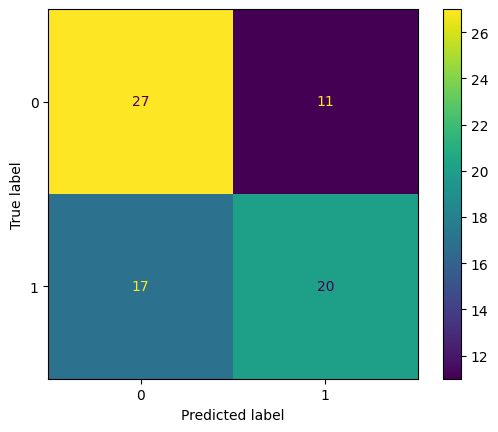

In [44]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)